# Netflix data analysis
This project analyzes the Netflix dataset to give insights about movies, TV shows, genres, countries, and IMDb/ TMDB scores.

INTRODUCTION

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


In [65]:
df= pd.read_csv(r"D:\netflix data analysis 2.0\data\titles.csv")
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850,5849,5850,5832,5850.000000,3231,5850.000000,5850,5850,2106.000000,5447,5368.000000,5.352000e+03,5759.000000,5539.000000
unique,5850,5798,2,5829,NaN,11,NaN,1726,452,NaN,5447,NaN,NaN,NaN,NaN
top,ts271048,Connected,MOVIE,Five families struggle with the ups and downs ...,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt13711094,NaN,NaN,NaN,NaN
freq,1,3,3744,2,NaN,883,NaN,484,1959,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.417094,NaN,76.888889,NaN,NaN,2.162868,NaN,6.510861,2.343938e+04,22.637925,6.829175
std,NaN,NaN,NaN,NaN,6.937726,NaN,39.002509,NaN,NaN,2.689041,NaN,1.163826,9.582047e+04,81.680263,1.170391
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.009442,0.500000
25%,NaN,NaN,NaN,NaN,2016.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.167500e+02,2.728500,6.100000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,83.000000,NaN,NaN,1.000000,NaN,6.600000,2.233500e+03,6.821000,6.900000
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,104.000000,NaN,NaN,2.000000,NaN,7.300000,9.494000e+03,16.590000,7.537500


DATA CLEANING

In [66]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [67]:
df.isnull().sum().sort_values(ascending=False)
# Fill or handle based on meaning
df.fillna({'age_certification':'Not Rated'}, inplace=True)
df.fillna({'genres':'Unknown'}, inplace=True)
df.fillna({'production_countries': 'Unknown'}, inplace=True)
df['imdb_score'] = df['imdb_score'].fillna(df['imdb_score'].mean())
df['tmdb_score'] = df['tmdb_score'].fillna(df['tmdb_score'].mean())

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
df['tmdb_score'] = pd.to_numeric(df['tmdb_score'], errors='coerce')

df['title'] = df['title'].str.strip()
df['description'] = df['description'].str.strip()

df['genres'] = df['genres'].apply(lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else [])
df['production_countries'] = df['production_countries'].apply(lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else [])

df.to_csv('netflix_cleaned.csv', index=False)

DATA VISUALIZATION

In [68]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6,4)

In [69]:
# Convert list-like columns safely
for col in ['genres', 'production_countries']:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

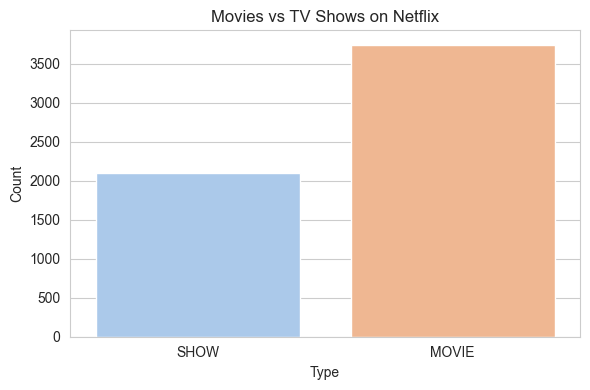

In [70]:
# 1️⃣ Movies vs TV Shows
sns.countplot(x='type', data=df, palette='pastel',hue='type',legend=False)
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

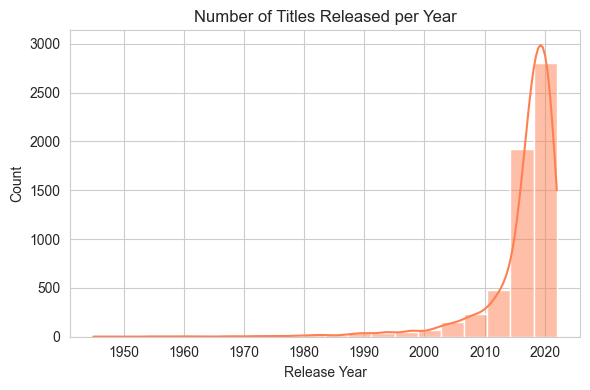

In [71]:
# Titles by Release Year
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
sns.histplot(df['release_year'].dropna(), bins=20, kde=True, color='coral')
plt.title("Number of Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

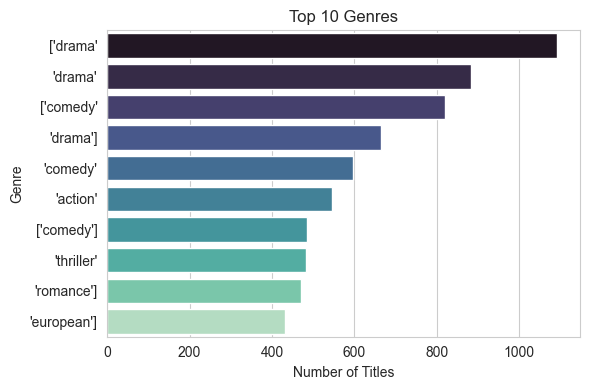

In [82]:

# Top 10 Genres
df_exploded = df.explode('genres')
df_exploded['genres'] = df_exploded['genres'].astype(str).str.strip().str.lower()
top_genres = df_exploded['genres'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako',hue=top_genres.index,legend=False)
plt.title("Top 10 Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

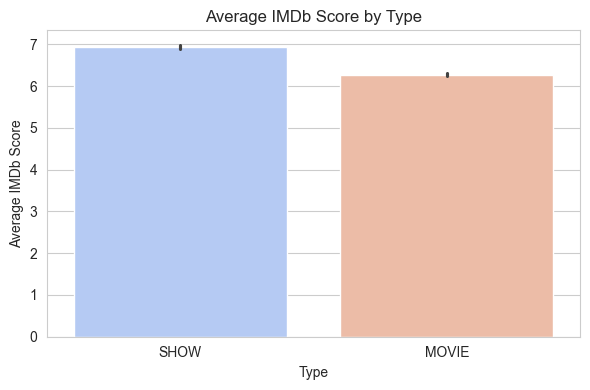

In [73]:
# 4️⃣ Average IMDb Score by Type
sns.barplot(x='type', y='imdb_score', data=df, palette='coolwarm', estimator='mean',hue='type',legend=False)
plt.title("Average IMDb Score by Type")
plt.xlabel("Type")
plt.ylabel("Average IMDb Score")
plt.tight_layout()
plt.show()

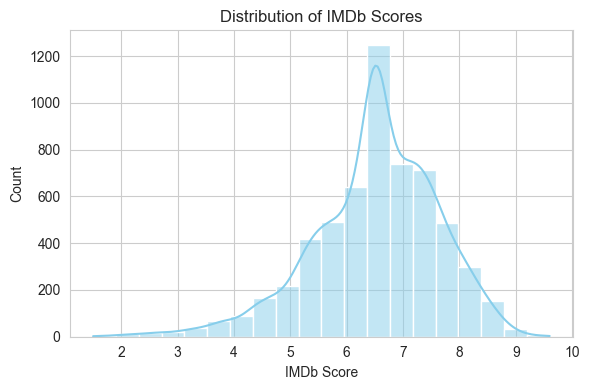

In [74]:
# 5️⃣ IMDb Score Distribution
sns.histplot(df['imdb_score'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


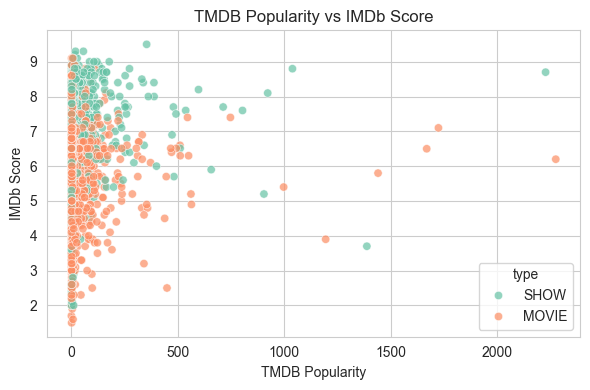

In [75]:
# 6️⃣ TMDB Popularity vs IMDb Score
sns.scatterplot(x='tmdb_popularity', y='imdb_score', hue='type', data=df, alpha=0.7, palette='Set2')
plt.title("TMDB Popularity vs IMDb Score")
plt.xlabel("TMDB Popularity")
plt.ylabel("IMDb Score")
plt.tight_layout()
plt.show()


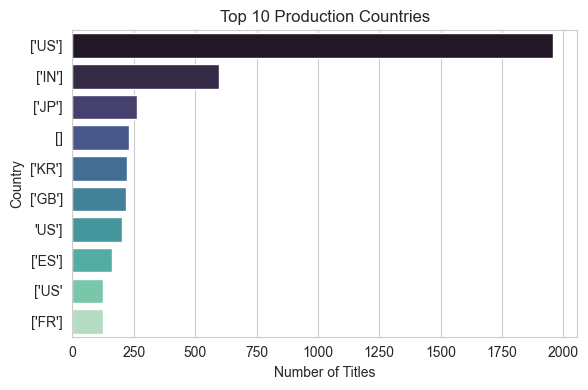

In [76]:
# 7️⃣ Top 10 Production Countries
df_country = df.explode('production_countries')
df_country['production_countries'] = df_country['production_countries'].astype(str).str.strip()
top_countries = df_country['production_countries'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako',hue=top_countries.index,legend=False)
plt.title("Top 10 Production Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

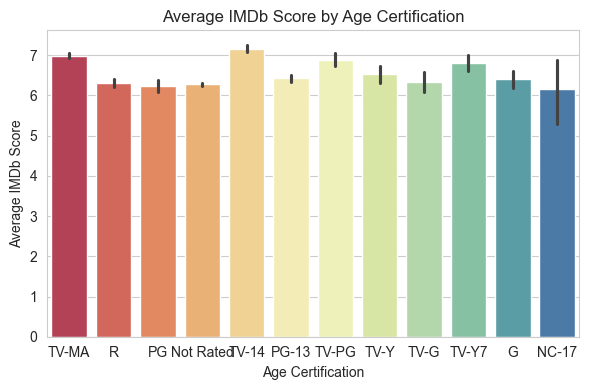

In [77]:
# 8️⃣ Average IMDb Score by Age Certification
sns.barplot(x='age_certification', y='imdb_score', data=df, palette='Spectral',hue='age_certification',legend=False)
plt.title("Average IMDb Score by Age Certification")
plt.xlabel("Age Certification")
plt.ylabel("Average IMDb Score")
plt.tight_layout()
plt.show()

INSIGHTS

#Content Type:
Movies make up the majority of the dataset, while TV Shows form a smaller portion.
This indicates Netflix invests more heavily in movie production and licensing.

#Release Year Trend:
The number of releases has grown significantly after 2015, showing Netflix’s expansion and increased investment in content production in recent years.

#Genres:
The most frequent genres are Drama, Comedy, and Action, which are globally popular and widely consumed.
This shows Netflix focuses on universally engaging genres.

#IMDb & TMDB Scores:
Most titles have IMDb scores between 6 and 8, indicating an overall moderate-to-good quality catalog.
TMDB popularity also tends to increase for higher IMDb scores, showing a positive correlation between quality and audience engagement.

#Age Certifications:
The dataset reveals that most content is rated 16+ or 18+, showing Netflix’s preference for more mature themes aimed at adults and late teens.

#Production Countries:
The top-producing countries are United States, India, and the United Kingdom, reflecting Netflix’s global dominance but English-language preference.
However, Netflix has started increasing its international productions over time.

#Runtime and Seasons:
Most movies have a runtime between 90–120 minutes, while most TV shows run for 1–3 seasons, showing a balance between short, engaging content and long-term storytelling.

CONCLUSION

In [ ]:
This analysis highlights Netflix’s evolving strategy as a global entertainment leader.
It focuses mainly on movies with drama and comedy as dominant genres.
Content production has surged in recent years, especially post-2015, as Netflix expanded its original programming.
The platform predominantly serves mature audiences, maintaining average IMDb ratings between 6–8, which signifies good content consistency.
The United States continues to be the main source of titles, but international contributions are growing steadily.

Overall, Netflix demonstrates a well-balanced mix of quality, diversity, and audience engagement, positioning itself as a dominant force in the global streaming industry.